In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from google.colab import drive
plt.style.use("fivethirtyeight")

In [3]:
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Data Frame/Dataset-Tugas.csv")
data.head()

Mounted at /content/drive


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **EDA**

In [5]:
data.drop(columns = 'class', inplace = True)

Menghapus kelas terget yaitu class

In [6]:
data.shape

(150, 4)

Dataset memiliki 150 baris dan 4 kolom setelah kelas targer di hapus

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Menampilkan informasi pada dataset, seperti tipe data dan nilainya

In [7]:
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


Tidak ada missing value atau data yang hilang

In [8]:
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


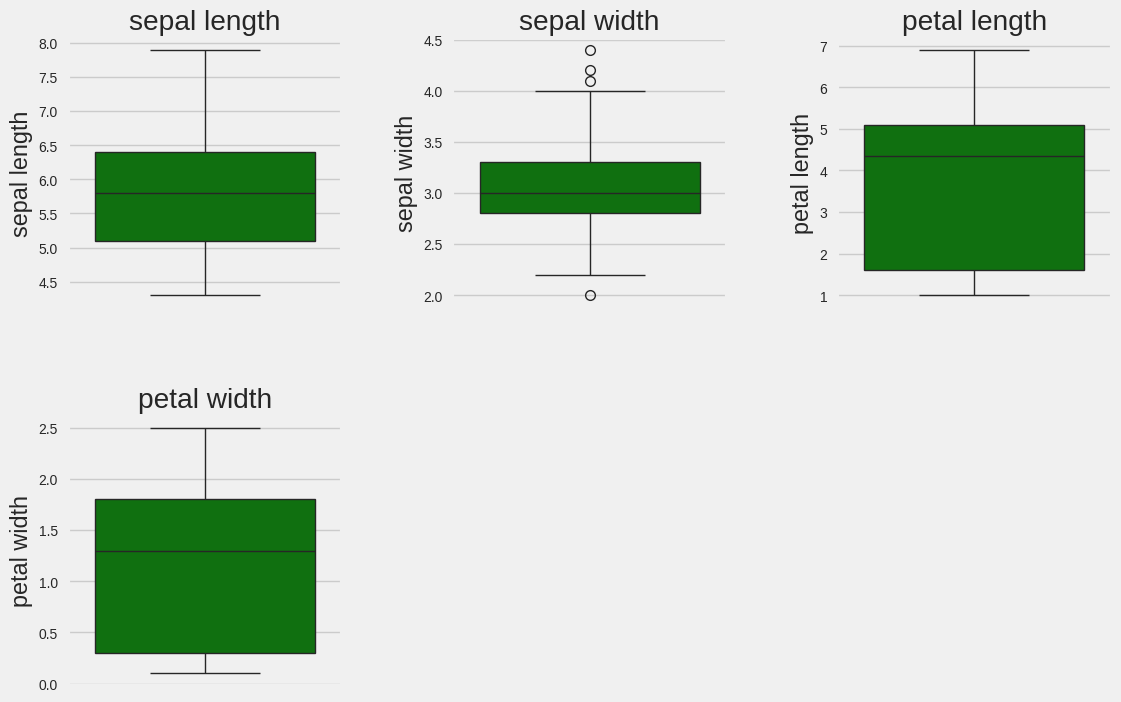

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def box_plot(data):
    # Definisikan variabel yang akan divisualisasikan
    variables = data.select_dtypes(exclude='object').columns

    # Calculate the number of rows and columns for subplots
    num_vars = len(variables)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = math.ceil(num_vars / num_cols)  # Calculate the number of rows needed

    # Buat figure dan axes untuk subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Flatten the axes array if necessary
    axes = axes.flatten()

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="green", ax=axes[i])
        axes[i].set_title(var)

    # Hide any empty subplots
    for i in range(num_vars, num_rows * num_cols):
        axes[i].set_visible(False)

    # Tampilkan plot
    plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(data)

Menampilkan boxplot dan melihat data yang outlier. Ternyata pada data ada 4 data yang outlier pada sepal width.

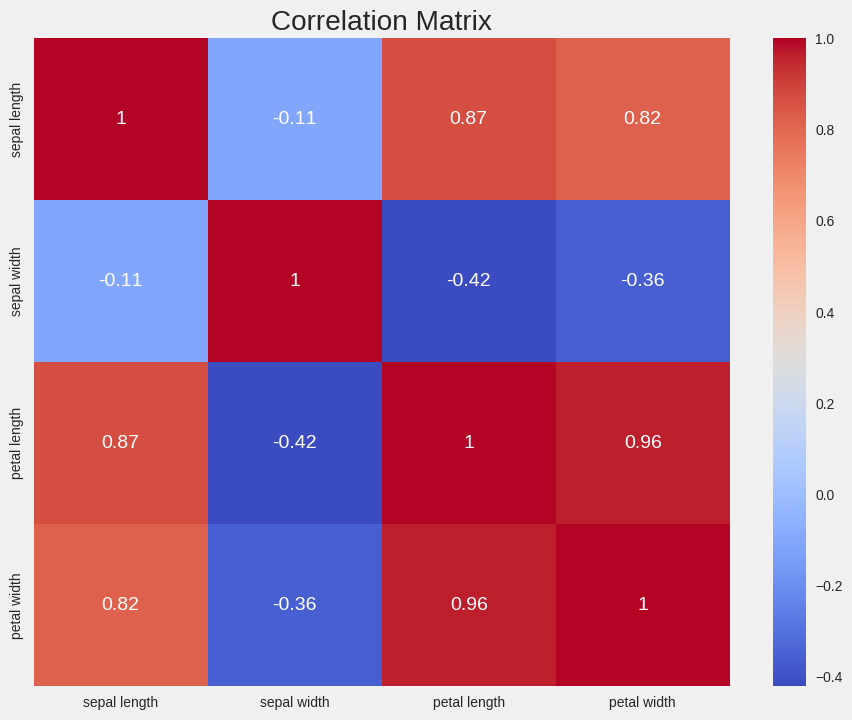

In [45]:
# Correlation Matrix
numeric_df = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Menampilkan matriks korelasi.Hasilnya berupa matriks korelasi dengan nilai antara -1 hingga 1.

* 1 menunjukkan korelasi positif sempurna
* -1 menunjukkan korelasi negatif sempurna
* 0 menunjukkan tidak ada korelasi

Sel dengan warna merah pekat menunjukkan korelasi positif yang kuat. Sel dengan warna biru pekat menunjukkan korelasi negatif yang kuat (mendekati -1). Sel dengan warna putih/abu-abu menunjukkan korelasi lemah (mendekati 0).




# **Pre-Processing**

In [7]:
# instantiate
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Melakukan normalisasi data dengan metode Min-Max Scaling, yang mengubah nilai setiap fitur menjadi dalam rentang 0 hingga 1. Proses ini bertujuan untuk menyamakan skala data agar algoritma machine learning, seperti K-Means atau DBSCAN, tidak terpengaruh oleh perbedaan skala antar fitur. Normalisasi juga membantu meningkatkan akurasi model dan mempercepat proses konvergensi algoritma yang sensitif terhadap skala, seperti algoritma berbasis optimasi. Hasil akhir berupa array numpy dengan data yang telah dinormalisasi.

# **Modelling**

## 1. K-Means

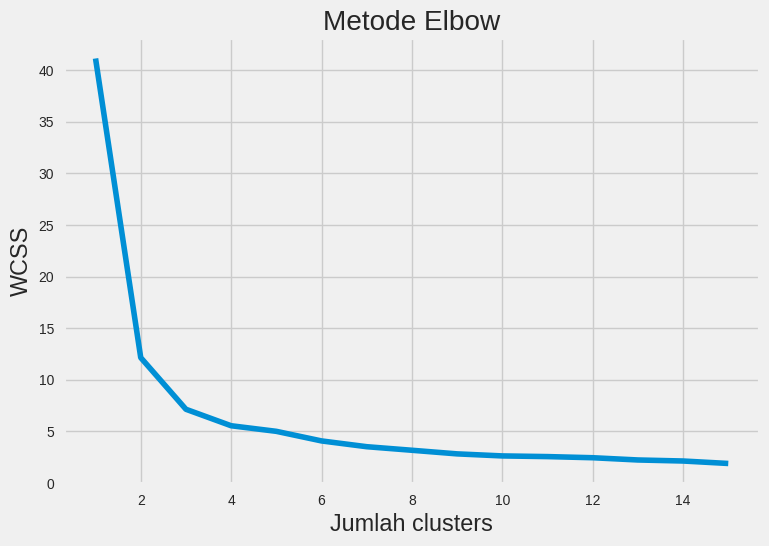

   sepal length  sepal width  petal length  petal width  Label_K-Means  \
0           5.1          3.5           1.4          0.2              1   
1           4.9          3.0           1.4          0.2              1   
2           4.7          3.2           1.3          0.2              1   
3           4.6          3.1           1.5          0.2              1   
4           5.0          3.6           1.4          0.2              1   

   Hasil_cluster  
0              0  
1              0  
2              0  
3              0  
4              0  


In [18]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

# Setelah melihat diagram elbow, tentukan nilai K yang optimal, misalnya K=3
# Fitting K-Means dengan K=3 (contoh)
kmeans_optimal = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred_kmeans = kmeans_optimal.fit_predict(X_scaled)

# Menambahkan hasil label K-Means ke dalam dataset sebagai kolom baru
data['Label_K-Means'] = y_pred_kmeans

# Tampilkan hasil data dengan label baru
print(data.head())


In [19]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

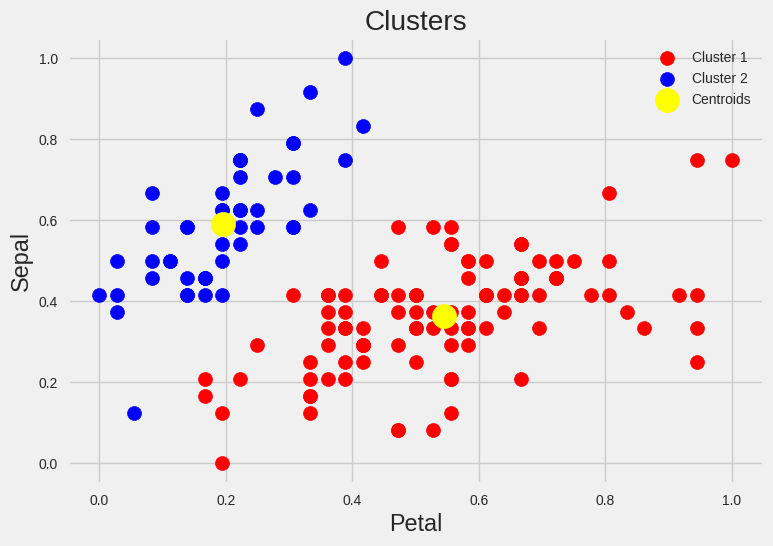

In [20]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters')
plt.xlabel('Petal')
plt.ylabel('Sepal')
plt.legend()
plt.show()

Melakukan klasterisasi data menggunakan algoritma K-Means. Pertama, metode Elbow digunakan untuk menentukan jumlah cluster yang optimal dengan menghitung Within-Cluster Sum of Squares (WCSS) untuk jumlah cluster yang berbeda. Grafik elbow memplot WCSS terhadap jumlah cluster, dan titik siku pada grafik digunakan untuk menentukan jumlah cluster optimal.

Setelah nilai K optimal dipilih (misalnya, K=3), model K-Means difitkan ke data ternormalisasi. Hasil klasterisasi berupa label untuk setiap data, yang kemudian ditambahkan ke dataset asli sebagai kolom baru bernama Label_K-Means.

## DB-Scan

In [12]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1,min_samples=10)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Klasterisasi data menggunakan algoritma DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Model dibuat dengan parameter epsilon (eps), yang menentukan radius pencarian untuk tetangga, dan min_samples, yaitu jumlah minimum sampel yang diperlukan untuk membentuk klaster. Setelah model diterapkan ke data, label klaster untuk setiap data dihitung.

Pada output berupa array label, di mana angka 0 menunjukkan bahwa semua data masuk ke dalam satu klaster, sedangkan tidak ada label -1, berarti tidak ada noise atau data yang diidentifikasi sebagai anomali dalam dataset berdasarkan parameter yang digunakan. Hasil ini menunjukkan bahwa model menganggap data homogen dan masuk dalam satu klaster saj

In [13]:
# Tambahkan label tersebut menjadi kolom baru didataset
data['Hasil_cluster'] = model2.labels_
data.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means,Hasil_cluster
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


Kita dapat melihat bahwa data tergolong dalam satu klaster saja.

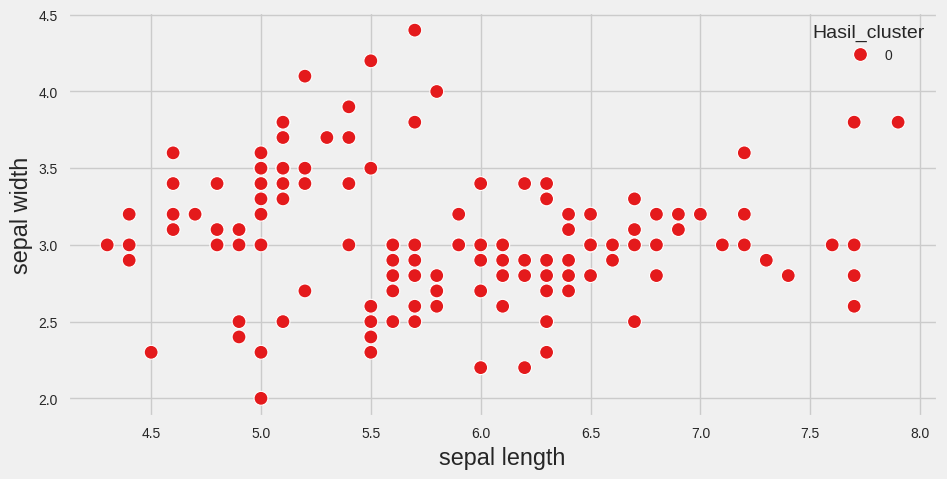

In [14]:
plt.figure(figsize=(10,5))

sns.scatterplot(x = 'sepal length', y = 'sepal width',
                hue = 'Hasil_cluster', data = data, palette = 'Set1', s=100);

Semua data berwarna sama, yang berarti satu klaster.

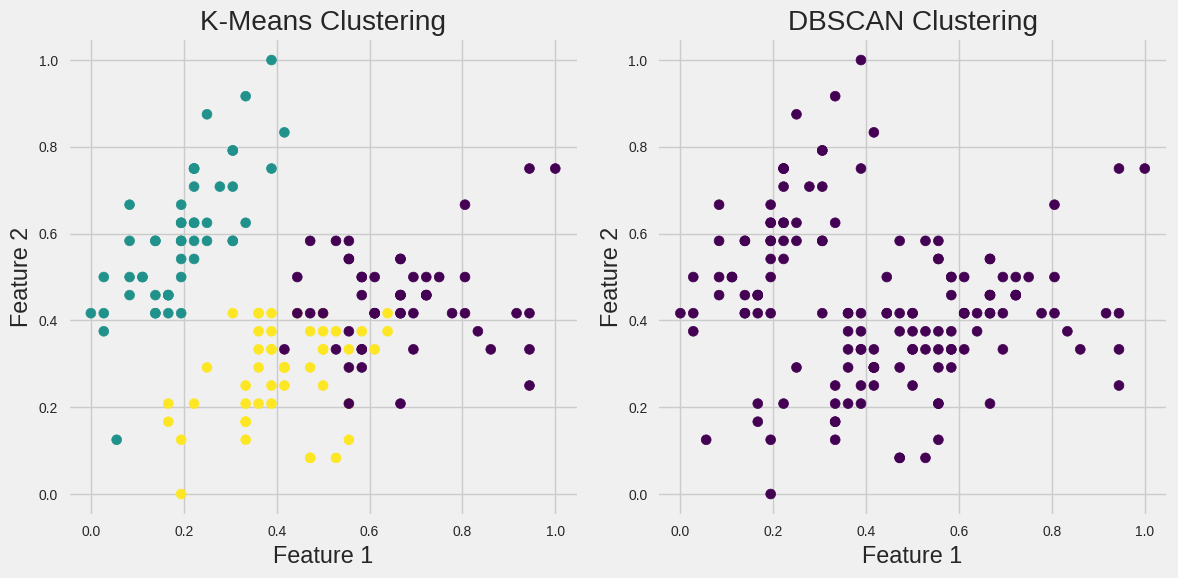

In [27]:
# Visualisasi Hasil K-Means dan DBSCAN
plt.figure(figsize=(12, 6))

# Plot K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Label_K-Means'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Label_DB-Scan'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


Perbandingan antara klaster dengan metode K-Means dan DB-Scan.

# **Matriks Evaluasi**

## 1. K-Means

In [21]:
# Evaluasi K-Means
kmeans_silhouette = silhouette_score(X_scaled, data['Label_K-Means'])
kmeans_db_index = davies_bouldin_score(X_scaled, data['Label_K-Means'])

# Menampilkan hasil evaluasi
print("Evaluasi K-Means:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_db_index}")


Evaluasi K-Means:
Silhouette Score: 0.48247222154221125
Davies-Bouldin Index: 0.7874978912757878


Evaluasi K-Means:
Silhouette Score: 0.48247222154221125
Davies-Bouldin Index: 0.7874978912757878


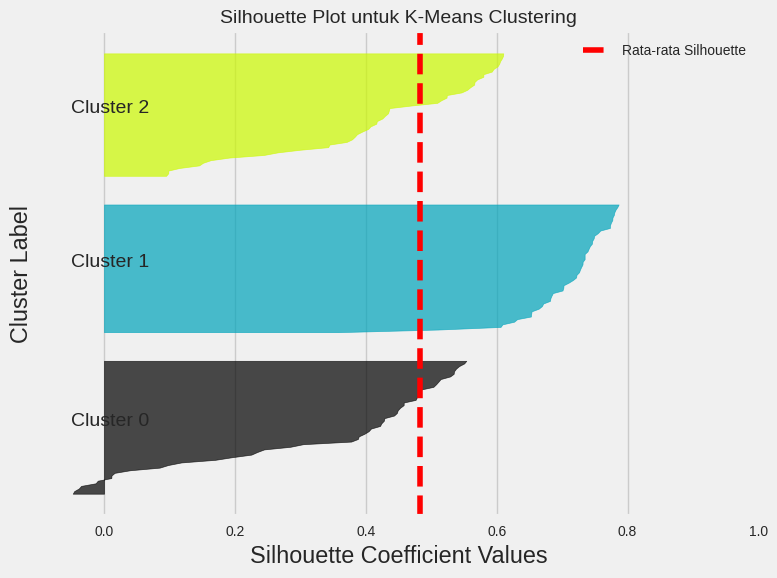

In [24]:
# Evaluasi K-Means
kmeans_silhouette = silhouette_score(X_scaled, data['Label_K-Means'])
kmeans_db_index = davies_bouldin_score(X_scaled, data['Label_K-Means'])

# Menampilkan hasil evaluasi
print("Evaluasi K-Means:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_db_index}")

# Membuat plot silhouette
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10  # Awal y
n_clusters = len(np.unique(data['Label_K-Means']))

# Calculate silhouette values for all samples
silhouette_vals = silhouette_samples(X_scaled, data['Label_K-Means'])


for i in range(n_clusters):
    # Filter nilai silhouette untuk cluster ke-i
    ith_cluster_silhouette_vals = silhouette_vals[data['Label_K-Means'] == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    # Warna setiap cluster
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # Label cluster pada plot
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Cluster {i}")
    y_lower = y_upper + 10

# Garis rata-rata silhouette score
ax.axvline(x=kmeans_silhouette, color="red", linestyle="--", label="Rata-rata Silhouette")
ax.set_title("Silhouette Plot untuk K-Means Clustering", fontsize=14)
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.legend(loc="best")

plt.tight_layout()
plt.show()

In [32]:
# Filter label DBSCAN untuk memastikan tidak ada outlier (-1)
dbscan_valid_labels = data['Label_DB-Scan'][data['Label_DB-Scan'] != -1]
X_dbscan_valid = X_scaled[data['Label_DB-Scan'] != -1]

# Evaluasi DBSCAN
if len(set(dbscan_valid_labels)) > 1:  # Pastikan ada lebih dari 1 cluster untuk silhouette score
    dbscan_silhouette = silhouette_score(X_dbscan_valid, dbscan_valid_labels)
    dbscan_db_index = davies_bouldin_score(X_dbscan_valid, dbscan_valid_labels)

    # Menampilkan hasil evaluasi
    print("\nEvaluasi DBSCAN:")
    print(f"Silhouette Score: {dbscan_silhouette:.4f}")
    print(f"Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("\nEvaluasi DBSCAN tidak dapat dilakukan karena kurang dari 2 cluster valid.")



Evaluasi DBSCAN tidak dapat dilakukan karena kurang dari 2 cluster valid.


In [33]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluasi K-Means
kmeans_silhouette = silhouette_score(X_scaled, data['Label_K-Means'])
kmeans_db_index = davies_bouldin_score(X_scaled, data['Label_K-Means'])

print("Evaluasi K-Means:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_db_index:.4f}")

# Evaluasi DBSCAN
# Filter label DBSCAN untuk memastikan tidak ada outlier (-1)
dbscan_valid_labels = data['Label_DB-Scan'][data['Label_DB-Scan'] != -1]
X_dbscan_valid = X_scaled[data['Label_DB-Scan'] != -1]

if len(set(dbscan_valid_labels)) > 1:  # Pastikan ada lebih dari 1 cluster untuk silhouette score
    dbscan_silhouette = silhouette_score(X_dbscan_valid, dbscan_valid_labels)
    dbscan_db_index = davies_bouldin_score(X_dbscan_valid, dbscan_valid_labels)

    print("\nEvaluasi DBSCAN:")
    print(f"Silhouette Score: {dbscan_silhouette:.4f}")
    print(f"Davies-Bouldin Index: {dbscan_db_index:.4f}")

    # Perbandingan K-Means dan DBSCAN
    print("\nPerbandingan:")
    if kmeans_silhouette > dbscan_silhouette and kmeans_db_index < dbscan_db_index:
        print("Model K-Means memberikan hasil clustering yang lebih baik berdasarkan evaluasi.")
    elif kmeans_silhouette < dbscan_silhouette and kmeans_db_index > dbscan_db_index:
        print("Model DBSCAN memberikan hasil clustering yang lebih baik berdasarkan evaluasi.")
    else:
        print("Tidak ada model yang dominan. K-Means dan DBSCAN memiliki keunggulan masing-masing.")
else:
    print("\nEvaluasi DBSCAN tidak dapat dilakukan karena kurang dari 2 cluster valid.")
    print("\nModel K-Means memberikan hasil clustering yang lebih baik karena DBSCAN tidak memiliki cluster valid.")


Evaluasi K-Means:
Silhouette Score: 0.4825
Davies-Bouldin Index: 0.7875

Evaluasi DBSCAN tidak dapat dilakukan karena kurang dari 2 cluster valid.

Model K-Means memberikan hasil clustering yang lebih baik karena DBSCAN tidak memiliki cluster valid.


*   Silhouette Score: Mengukur seberapa baik setiap titik data cocok dengan klaster yang ditentukan. Nilai berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan klaster yang lebih baik dan lebih terpisah dengan jelas.

*  Davies-Bouldin Index: Menilai kualitas klaster dengan membandingkan jarak antar klaster dan jarak dalam klaster. Nilai yang lebih rendah menunjukkan klaster yang lebih baik dan lebih terpisah.

Akan tetapi karena pada evaluasi DB-Scan klasternya hanya 1, maka model K-Means  memberikan hasil clatering yang lebih baik dan bagus.

